In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

data = pd.read_csv("ecommerce_customer_data.csv")
print(data.head())


   User_ID  Gender  Age   Location Device_Type  Product_Browsing_Time  \
0        1  Female   23  Ahmedabad      Mobile                     60   
1        2    Male   25    Kolkata      Tablet                     30   
2        3    Male   32  Bangalore     Desktop                     37   
3        4    Male   35      Delhi      Mobile                      7   
4        5    Male   27  Bangalore      Tablet                     35   

   Total_Pages_Viewed  Items_Added_to_Cart  Total_Purchases  
0                  30                    1                0  
1                  38                    9                4  
2                  13                    5                0  
3                  20                   10                3  
4                  20                    8                2  


In [7]:
#summary statistics for numeric columns
numeric_summary = data.describe()
print(numeric_summary)

          User_ID         Age  Product_Browsing_Time  Total_Pages_Viewed  \
count  500.000000  500.000000             500.000000          500.000000   
mean   250.500000   26.276000              30.740000           27.182000   
std    144.481833    5.114699              15.934246           13.071596   
min      1.000000   18.000000               5.000000            5.000000   
25%    125.750000   22.000000              16.000000           16.000000   
50%    250.500000   26.000000              31.000000           27.000000   
75%    375.250000   31.000000              44.000000           38.000000   
max    500.000000   35.000000              60.000000           50.000000   

       Items_Added_to_Cart  Total_Purchases  
count           500.000000       500.000000  
mean              5.150000         2.464000  
std               3.203127         1.740909  
min               0.000000         0.000000  
25%               2.000000         1.000000  
50%               5.000000         2.00

In [9]:
#summary for nor numeric coloumns
categorical_summary = data.describe(include = "object")
print(categorical_summary)

       Gender Location Device_Type
count     500      500         500
unique      2        8           3
top      Male  Kolkata      Mobile
freq      261       71         178


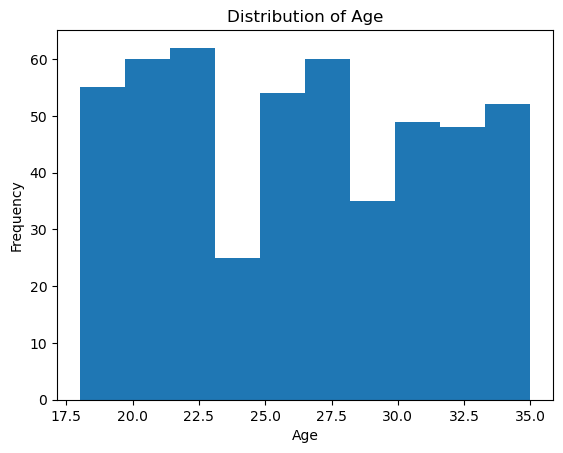

In [17]:
#Histogram for "Age"
fig = px.histogram(data, x = 'Age', title ="Distribution of Age")
fig.show()


#histogram for age in matplotlib.pyplot
ages = data['Age']
plt.hist(ages)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()


In [27]:
#Bar chart for Gender
gender_counts = data["Gender"].value_counts().reset_index()
print(gender_counts)

fig = px.bar(gender_counts, x = "Gender",y = "count", title = "Gender Distribution")

fig.show()

   Gender  count
0    Male    261
1  Female    239


In [31]:
#Product browsing time vs Total pages viewed
fig = px.scatter(data, x = "Product_Browsing_Time", y = "Total_Pages_Viewed", title = "Product Browsing Time VS Total Pages Viewed", trendline= "ols")
fig.show()

In [44]:
#Grouped analysis
gender_group = data.groupby('Gender')["Total_Pages_Viewed"].mean().reset_index()
print(gender_group)

fig = px.bar(gender_group, x = "Gender", y = "Total_Pages_Viewed", title = 'Average Total pages visited by Gender')
fig.show()

   Gender  Total_Pages_Viewed
0  Female           27.577406
1    Male           26.819923


In [55]:
#average total pages visited by different devices
print(data.head())

device_data = data.groupby('Device_Type')['Total_Pages_Viewed'].mean().reset_index()
print(device_data)

fig = px.bar(device_data,x = 'Device_Type', y = "Total_Pages_Viewed", title = "Total pages visited by Devices")
fig.show()

   User_ID  Gender  Age   Location Device_Type  Product_Browsing_Time  \
0        1  Female   23  Ahmedabad      Mobile                     60   
1        2    Male   25    Kolkata      Tablet                     30   
2        3    Male   32  Bangalore     Desktop                     37   
3        4    Male   35      Delhi      Mobile                      7   
4        5    Male   27  Bangalore      Tablet                     35   

   Total_Pages_Viewed  Items_Added_to_Cart  Total_Purchases  
0                  30                    1                0  
1                  38                    9                4  
2                  13                    5                0  
3                  20                   10                3  
4                  20                    8                2  
  Device_Type  Total_Pages_Viewed
0     Desktop           26.000000
1      Mobile           27.792135
2      Tablet           27.668712


In [64]:
#let's calculate the customer lifetime value and visualize segments based on the customer lifetime value:
data['CLV'] = (data["Total_Purchases"] * data['Total_Pages_Viewed']) / data['Age']

data['Segment']  = pd.cut(data["CLV"], bins = [1,2.5,5,float('inf')], labels = ['Low Vlaue', 'Medium Value', 'High Value'])

segment_counts = data['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']
print(segment_counts)

#creating a bar chart to visualize the customer segments
fig = px.bar(segment_counts, x = 'Segment',y = 'Count', title = 'Customer Segmentation by CLV')
fig.update_yaxes(title = "Number of Customers")
fig.show()

        Segment  Count
0     Low Vlaue    131
1  Medium Value    116
2    High Value     91


In [71]:
#funnel analysis
funnel_data = data[["Product_Browsing_Time", "Items_Added_to_Cart", "Total_Purchases"]]
funnel_data = funnel_data.groupby(['Product_Browsing_Time', "Items_Added_to_Cart"]).sum().reset_index()
print(funnel_data)

fig = px.funnel(funnel_data, x = "Product_Browsing_Time", y = "Items_Added_to_Cart", title = "Conversion Funnel")
fig.show()

     Product_Browsing_Time  Items_Added_to_Cart  Total_Purchases
0                        5                    2                3
1                        5                    3                5
2                        5                    6                0
3                        5                    7                1
4                        5                    8                3
..                     ...                  ...              ...
337                     60                    1                0
338                     60                    6                0
339                     60                    7                5
340                     60                    8               10
341                     60                    9                4

[342 rows x 3 columns]


In [75]:
#churn rate of the customers
data["Charned"] = data["Total_Purchases"] == 0

churn_rate = data["Charned"].mean()
print(churn_rate)

0.198
